# Viator End of Year Analytics

In [1]:
import sys
sys.path.append('../../')
from env import conn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cs = conn.cursor()

In [3]:
def execute_query(query):
    try:
        cur = conn.cursor()
        cur.execute(query)

        df = pd.DataFrame(cur.fetchall(), columns=[col[0] for col in cur.description])
        return df
    finally:
        cur.close()

In [4]:
query = """select * from PROD.BINK_SECURE.FACT_TRANSACTION
        where loyalty_plan_company = 'Viator'
         order by event_date_time;"""

df = execute_query(query)

In [5]:
df.head()

,EVENT_ID,EVENT_DATE_TIME,USER_ID,EXTERNAL_USER_REF,CHANNEL,BRAND,TRANSACTION_ID,PROVIDER_SLUG,FEED_TYPE,DUPLICATE_TRANSACTION,...,SPEND_CURRENCY,LOYALTY_ID,LOYALTY_CARD_ID,MERCHANT_ID,PAYMENT_ACCOUNT_ID,SETTLEMENT_KEY,AUTH_CODE,APPROVAL_CODE,INSERTED_DATE_TIME,UPDATED_DATE_TIME
0,508949,2022-08-18 17:20:17.786535,597581,,BINK,BINK,482230624134864,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
1,512003,2022-08-19 14:17:44.313373,597581,,BINK,BINK,482231514606471,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
2,513882,2022-08-20 07:24:08.667430,597581,,BINK,BINK,632231476961839,bpl-viator,REFUND,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,53cf47f120519be3cdd1ba73eef6e0ec0144f99813d955...,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
3,514497,2022-08-20 08:53:50.120120,597581,,BINK,BINK,482230390763357,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
4,515334,2022-08-20 14:01:43.659954,597581,,BINK,BINK,MCCDTKOBX,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,351565,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631


In [6]:
df.describe()

,EVENT_ID,EVENT_DATE_TIME,TRANSACTION_DATE,SPEND_AMOUNT,INSERTED_DATE_TIME,UPDATED_DATE_TIME
count,8.690000e+02,869,869,869.000000,869,869
mean,7.969998e+06,2023-05-29 19:39:48.268585216,2023-05-28 08:53:21.208285696,64.634799,2023-11-27 13:47:40.254555648,2023-11-27 13:47:40.254555648
min,5.089490e+05,2022-08-18 17:20:17.786535,2022-08-17 14:35:00,-796.410000,2023-11-27 11:44:28.631000,2023-11-27 11:44:28.631000
25%,4.840804e+06,2023-04-11 20:40:01.158011904,2023-04-11 20:39:55,-1.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
50%,8.269637e+06,2023-06-28 04:19:19.142560,2023-06-28 04:19:16,15.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
75%,1.154178e+07,2023-09-02 22:44:33.659697920,2023-08-31 19:45:45,106.130000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
max,1.635520e+07,2023-12-06 01:19:39.442129,2023-12-05 19:02:07,1679.480000,2023-12-06 02:15:20.701000,2023-12-06 02:15:20.701000
std,4.627941e+06,NaN,NaN,172.573183,NaN,NaN


In [7]:
df.columns

Index(['EVENT_ID', 'EVENT_DATE_TIME', 'USER_ID', 'EXTERNAL_USER_REF',
       'CHANNEL', 'BRAND', 'TRANSACTION_ID', 'PROVIDER_SLUG', 'FEED_TYPE',
       'DUPLICATE_TRANSACTION', 'LOYALTY_PLAN_NAME', 'LOYALTY_PLAN_COMPANY',
       'TRANSACTION_DATE', 'SPEND_AMOUNT', 'SPEND_CURRENCY', 'LOYALTY_ID',
       'LOYALTY_CARD_ID', 'MERCHANT_ID', 'PAYMENT_ACCOUNT_ID',
       'SETTLEMENT_KEY', 'AUTH_CODE', 'APPROVAL_CODE', 'INSERTED_DATE_TIME',
       'UPDATED_DATE_TIME'],
      dtype='object')

In [8]:
df["EXTERNAL_USER_REF"] = df["EXTERNAL_USER_REF"].apply(hash)

df_agg = df.groupby(by="EXTERNAL_USER_REF", ).agg(
    TRANSACTION_ID_count=('TRANSACTION_ID', 'count'),
    SPEND_AMOUNT_sum = ('SPEND_AMOUNT','sum'),
    SPEND_AMOUNT_mean = ('SPEND_AMOUNT','mean'),
    SPEND_AMOUNT_min = ('SPEND_AMOUNT','min', ),
    SPEND_AMOUNT_max = ('SPEND_AMOUNT','max', ),
    SPEND_AMOUNT_range = ('SPEND_AMOUNT',lambda x: x.max() - x.min()),
    EVENT_DATE_TIME_range = ('EVENT_DATE_TIME', lambda x: (x.max() - x.min()).days),
    EVENT_DATE_TIME_max = ('EVENT_DATE_TIME', 'min'),
    EVENT_DATE_TIME_min = ('EVENT_DATE_TIME', 'max'),
)

df_agg.describe()

,TRANSACTION_ID_count,SPEND_AMOUNT_sum,SPEND_AMOUNT_mean,SPEND_AMOUNT_min,SPEND_AMOUNT_max,SPEND_AMOUNT_range,EVENT_DATE_TIME_range,EVENT_DATE_TIME_max,EVENT_DATE_TIME_min
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253,253
mean,3.434783,222.006482,109.505836,64.360791,171.312688,106.951897,19.557312,2023-07-07 08:20:13.640918528,2023-07-27 03:33:20.817120
min,1.000000,-335.460000,-43.820000,-796.410000,-43.820000,0.000000,0.000000,2022-08-18 17:20:17.786535,2022-10-07 16:18:45.107418
25%,1.000000,39.300000,20.012000,-1.000000,47.940000,0.000000,0.000000,2023-05-08 18:38:44.444780032,2023-05-27 02:16:49.293405952
50%,2.000000,118.000000,59.226667,28.540000,114.000000,2.000000,0.000000,2023-07-02 23:28:40.473444096,2023-07-31 05:01:50.525680896
75%,3.000000,278.010000,133.340000,105.270000,209.420000,119.530000,15.000000,2023-08-29 10:17:18.997880064,2023-09-24 17:12:14.824730112
max,177.000000,2048.360000,1679.480000,1679.480000,1679.480000,1592.820000,444.000000,2023-12-05 00:07:40.338953,2023-12-06 01:19:39.442129
std,11.266641,318.810532,169.758175,199.300423,206.665566,210.388371,48.060990,NaN,NaN


In [9]:
df_agg.columns

Index(['TRANSACTION_ID_count', 'SPEND_AMOUNT_sum', 'SPEND_AMOUNT_mean',
       'SPEND_AMOUNT_min', 'SPEND_AMOUNT_max', 'SPEND_AMOUNT_range',
       'EVENT_DATE_TIME_range', 'EVENT_DATE_TIME_max', 'EVENT_DATE_TIME_min'],
      dtype='object')

In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, -9107518504595824912 to 9209223984260639065
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRANSACTION_ID_count   253 non-null    int64         
 1   SPEND_AMOUNT_sum       253 non-null    float64       
 2   SPEND_AMOUNT_mean      253 non-null    float64       
 3   SPEND_AMOUNT_min       253 non-null    float64       
 4   SPEND_AMOUNT_max       253 non-null    float64       
 5   SPEND_AMOUNT_range     253 non-null    float64       
 6   EVENT_DATE_TIME_range  253 non-null    int64         
 7   EVENT_DATE_TIME_max    253 non-null    datetime64[ns]
 8   EVENT_DATE_TIME_min    253 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 19.8 KB


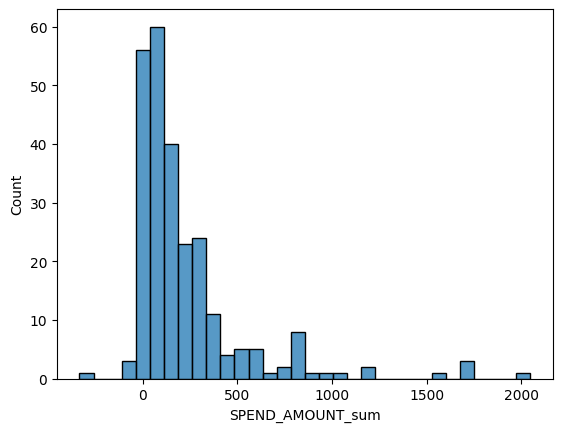

In [11]:
plot = sns.histplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

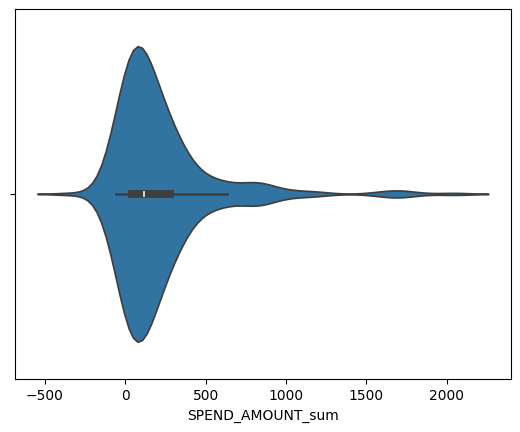

In [12]:
plot = sns.violinplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

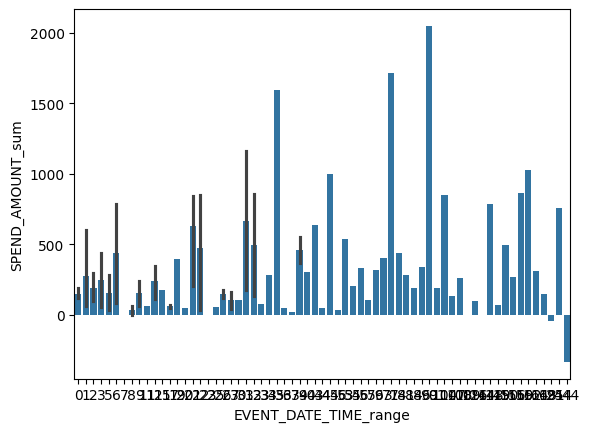

In [13]:
plot = sns.barplot(data=df_agg, x=df_agg['EVENT_DATE_TIME_range'], y=df_agg['SPEND_AMOUNT_sum'])

<Axes: >

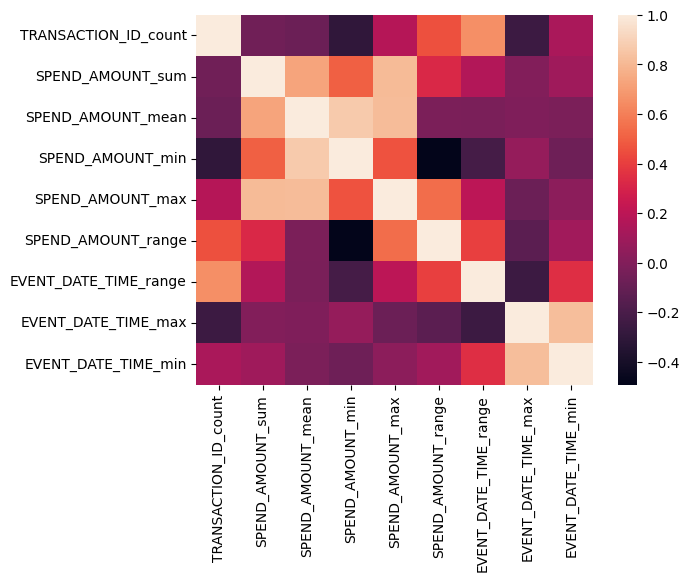

In [14]:
corr = df_agg.corr()
sns.heatmap(corr)